In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import urllib  # the lib that handles the url stuff
import io
import requests

url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt'
f=requests.get(url).content
df1=pd.read_csv(io.StringIO(f.decode('utf-8')))

url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt'
f=requests.get(url).content
df2=pd.read_csv(io.StringIO(f.decode('utf-8')))

url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170429.txt'
f=requests.get(url).content
df3=pd.read_csv(io.StringIO(f.decode('utf-8')))

url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170422.txt'
f=requests.get(url).content
df4=pd.read_csv(io.StringIO(f.decode('utf-8')))

df = pd.concat([df1, df2, df3, df4])

df = df.reset_index(drop=True)

In [36]:
df2 = df.groupby(["SCP", "STATION", "DATE", "TIME"]).sum() #generates a groupby object #.sum() is aggregation function
df2

df3 = df2[df2["ENTRIES"]<10000]

df4stationsmonthly = df3stationswdates.groupby(["STATION"]).agg(lambda x: sum(x))

df4monthlymillions = df4stationsmonthly[df4stationsmonthly["ENTRIES"]>54200000000]

ENTRIES  \
SCP      STATION   DATE       TIME                 
00-00-00 1 AV      04/15/2017 00:00:00  12230067   
                              04:00:00  12230154   
                              08:00:00  12230224   
                              12:00:00  12230697   
                              16:00:00  12231294   
                              20:00:00  12231847   
                   04/16/2017 00:00:00  12232270   
                              04:00:00  12232389   
                              08:00:00  12232436   
                              12:00:00  12232839   
                              16:00:00  12233388   
                              20:00:00  12233753   
                   04/17/2017 00:00:00  12234004   
                              04:00:00  12234031   
                              08:00:00  12234319   
                              12:00:00  12235367   
                              16:00:00  12235988   
                              20:00:00  12236855   
                   04/18/2017 00:00:00  12237211   
                              04:00:00  12237252   
                              08:00:00  12237571   
                              12:00:00  12238693   
                              16:00:00  12239379   
                              20:00:00  12240348   
                   04/19/2017 00:00:00  12240722   
                              04:00:00  12240748   
                              08:00:00  12241116   
                              12:00:00  12242227   
                              16:00:00  12243255   
                              20:00:00  12244377   
...                                          ...   
05-06-01 FULTON ST 05/08/2017 03:00:00  34216392   
                              07:00:00  34216394   
                              11:00:00  34216466   
                              15:00:00  34216637   
                              19:00:00  34217226   
                              23:00:00  34217360   
                   05/09/2017 03:00:00  34217376   
                              07:00:00  34217388   
                              11:00:00  34217446   
                              15:00:00  34217625   
                              19:00:00  34218232   
                              23:00:00  34218406   
                   05/10/2017 03:00:00  34218431   
                              07:00:00  34218438   
                              11:00:00  34218493   
                              15:00:00  34218639   
                              19:00:00  34219214   
                              23:00:00  34219375   
                   05/11/2017 03:00:00  34219399   
                              07:00:00  34219402   
                              11:00:00  34219474   
                              15:00:00  34219682   
                              19:00:00  34220281   
                              23:00:00  34220449   
                   05/12/2017 03:00:00  34220477   
                              07:00:00  34220481   
                              11:00:00  34220547   
                              15:00:00  34220741   
                              19:00:00  34221258   
                              23:00:00  34221383   

                                        EXITS                                                                 
SCP      STATION   DATE       TIME                                                                            
00-00-00 1 AV      04/15/2017 00:00:00                                           13475597                     
                              04:00:00                                           13475795                     
                              08:00:00                                           13475944                     
                              12:00:00                                           13476459                     
                              16:00:00                                           13477223         

In [63]:
df3 = df2.groupby(["SCP", "STATION", "DATE",]).agg(lambda x: max(x)-min(x))
#df2.groupby(["STATION"]).sum()

ENTRIES  \
SCP      STATION   DATE                  
00-00-00 1 AV      04/15/2017     1780   
                   04/16/2017     1483   
                   04/17/2017     2851   
                   04/18/2017     3137   
                   04/19/2017     3655   
                   04/20/2017     3681   
                   04/21/2017     3783   
                   04/22/2017     2272   
                   04/23/2017     1682   
                   04/24/2017     3277   
                   04/25/2017     3748   
                   04/26/2017     3824   
                   04/27/2017     3825   
                   04/28/2017     3381   
                   04/29/2017     1892   
                   04/30/2017     1627   
                   05/01/2017     3805   
                   05/02/2017     3611   
                   05/03/2017     3732   
                   05/04/2017     3757   
                   05/05/2017     3534   
                   05/06/2017        0   
                   05/07/2017        1   
                   05/08/2017     3224   
                   05/09/2017     3785   
                   05/10/2017     3442   
                   05/11/2017     3602   
                   05/12/2017     2477   
         103 ST    04/15/2017     4387   
                   04/16/2017     3779   
...                                ...   
05-06-00 FULTON ST 05/11/2017      489   
                   05/12/2017      436   
05-06-01 FULTON ST 04/15/2017      324   
                   04/16/2017      184   
                   04/17/2017      898   
                   04/18/2017     1022   
                   04/19/2017     1019   
                   04/20/2017     1000   
                   04/21/2017      917   
                   04/22/2017      252   
                   04/23/2017      177   
                   04/24/2017     1015   
                   04/25/2017     1099   
                   04/26/2017     1036   
                   04/27/2017     1046   
                   04/28/2017      931   
                   04/29/2017      358   
                   04/30/2017      250   
                   05/01/2017     1073   
                   05/02/2017     1041   
                   05/03/2017      993   
                   05/04/2017      989   
                   05/05/2017      949   
                   05/06/2017      392   
                   05/07/2017      283   
                   05/08/2017      968   
                   05/09/2017     1030   
                   05/10/2017      944   
                   05/11/2017     1050   
                   05/12/2017      906   

                               EXITS                                                                 
SCP      STATION   DATE                                                                              
00-00-00 1 AV      04/15/2017                                               2503                     
                   04/16/2017                                               1827                     
                   04/17/2017                                               3551                     
                   04/18/2017                                               3635                     
                   04/19/2017                                               3773                     
                   04/20/2017                                               3958                     
                   04/21/2017                                               4107                     
                   04/22/2017                                               3705                     
                   04/23/2017                                               3108                     
                   04/24/2017                                               3816                     
                   04/25/2017                                               3701                     
                   04/26/2017                             

In [70]:
df3.groupby(["STATION"]).sum()

#df3 = df2.groupby(["STATION", "DATE"]).agg(lambda x: max(x)-min(x))
#df3

,ENTRIES,EXITS
STATION,,
1 AV,26698134756,27921688438
103 ST,1121541196,14300523820
103 ST-CORONA,370834506,620943628
104 ST,56806927695,53414482052
110 ST,300550846,281567625
111 ST,1409288705,469752526
116 ST,35883240333,45557666781
116 ST-COLUMBIA,32340951773,6521841868
121 ST,68093285,94495933


In [64]:
df3stationswdates = df3[df3["ENTRIES"]>10000]

df4stationsmonthly = df3stationswdates.groupby(["STATION"]).agg(lambda x: sum(x))

df4monthlymillions = df4stationsmonthly[df4stationsmonthly["ENTRIES"]>54200000000]
df4monthlymillions

,ENTRIES,EXITS
STATION,,
104 ST,56806927695,53414482052
125 ST,56290839069,41820632317
14 ST,59651319590,42523648221
163 ST-AMSTERDM,54671066197,18582848855
18 AV,54429240619,38045999714
23 ST,55931282097,54497127169
3 AV-149 ST,54446668941,34768960258
42 ST-PORT AUTH,56900147482,51224723073
CANAL ST,58836938507,62076532627


In [65]:
df4monthlymillions['station'] = df4monthlymillions.index
#df4monthlymillions['Stationnum'] = [1, 2, 3, 4, 5, 6, 7, 8, 9]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
df4monthlymillions

,ENTRIES,EXITS,station
STATION,,,
104 ST,56806927695,53414482052,104 ST
125 ST,56290839069,41820632317,125 ST
14 ST,59651319590,42523648221,14 ST
163 ST-AMSTERDM,54671066197,18582848855,163 ST-AMSTERDM
18 AV,54429240619,38045999714,18 AV
23 ST,55931282097,54497127169,23 ST
3 AV-149 ST,54446668941,34768960258,3 AV-149 ST
42 ST-PORT AUTH,56900147482,51224723073,42 ST-PORT AUTH
CANAL ST,58836938507,62076532627,CANAL ST


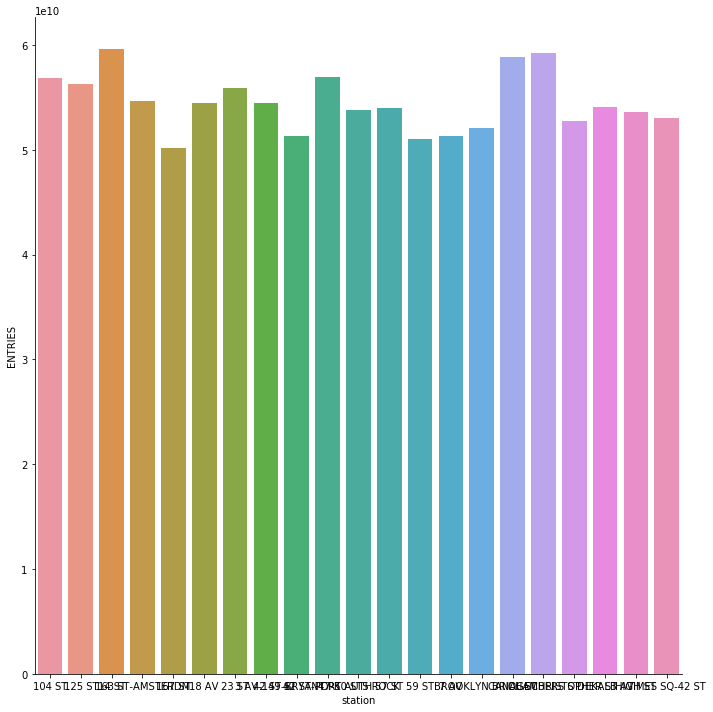

In [53]:
sns.factorplot(x="station", y="ENTRIES", kind='bar', data=df4monthlymillions, size=10, col_order=[]);